# Pruebas Saber Pro

# Proyecto Ánalisis de Datos e Inteligencia Artificial

Mediante este proyecto se pretende desmenuzar un conjunto de datos que contiene información concerniente a las pruebas saber pro, presentadas por estudiantes de pregrado en Colombia.

Se tiene información de indole social, económica y académica, que nos pueden ayudar a entender un poco más a fondo el rendimiento de los estudiantes.

Algunas de las cosas que podriamos responder:

- ¿ Como afecta el estrato social a el rendimiento esperado?
- ¿ Cual es la diferencia de rendiemiento entre las regiones del país?
- ¿ En que afecta la educación de los padres al rendimiento de los hijos?
- ¿ Como influyen factores socieconomicos como tener computador o internet al rendimiento?

**Modelo de AI**

Por ultimo se realizará un modelo de inteligencia artificial, que se base en el ánalisis que realizamos, que prediga cual será el rendimiento de estudiantes de un conjunto de prueba, y evaluaremos su rendimiento con diferentes metricas automatizadas que nos indiquen la certeza del modelo.

# Importación

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from keras import layers, models
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold
from keras import regularizers
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Semestre 8/AI & Data Science/PruebasSaberPro/train.csv'
test_path = '/content/drive/MyDrive/Semestre 8/AI & Data Science/PruebasSaberPro/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [ ]:
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa


# Data Cleanage and Engineering

# Label Encode

In [ ]:
def labelEncode(df, target):
    label_estrato = {"Estrato 1":1,"Estrato 2":2,"Estrato 3":3,"Estrato 4":4,"Estrato 5":5,"Estrato 6":6}
    label_educacion = {"Ninguno":1,"Primaria incompleta":2,
                   "Primaria completa":3, "Secundaria (Bachillerato) incompleta":4,
                   "Secundaria (Bachillerato) completa":5,"Técnica o tecnológica incompleta":6,
                  "Educación profesional incompleta":7,"Técnica o tecnológica completa":8,
                   "Educación profesional completa":9, "Postgrado": 10
                  }
    label_matricula = {
        "Entre 1 millón y menos de 2.5 millones":3,
    "Entre 2.5 millones y menos de 4 millones":4,
    "Menos de 500 mil":1,
    "Entre 500 mil y menos de 1 millón":2,
    "Entre 4 millones y menos de 5.5 millones":5,
    "Más de 7 millones":7,
    "Entre 5.5 millones y menos de 7 millones":6,
    }

    label_trabajo = {
        "Más de 30 horas":4,
    "0":0,
    "Entre 11 y 20 horas":2,
    "Entre 21 y 30 horas":3,
    "Menos de 10 horas":1
}
    label_score = {
    "alto":4,"medio-alto":3,"medio-bajo":2,"bajo":1
}
    label_binary = {"Si": 1,"No": 0}

    df.drop

    df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].map(label_estrato)
    df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].map(label_educacion)
    df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].map(label_educacion)
    df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].map(label_matricula)
    df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].map(label_trabajo)
    if target != False:
        df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(label_score)
    df['FAMI_TIENELAVADORA'] = df['FAMI_TIENELAVADORA'].map(label_binary)
    df['FAMI_TIENEAUTOMOVIL'] = df['FAMI_TIENEAUTOMOVIL'].map(label_binary)
    df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].map(label_binary)
    df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].map(label_binary)
    df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].map(label_binary)

    return df

In [ ]:
labeled_train = labelEncode(train,True)
labeled_test = labelEncode(test,False)

# Valores Nulos

In [ ]:
(labeled_train.isna().sum(axis=0)/train.shape[0]) * 100

ID                                0.000000
PERIODO                           0.000000
ESTU_PRGM_ACADEMICO               0.000000
ESTU_PRGM_DEPARTAMENTO            0.000000
ESTU_VALORMATRICULAUNIVERSIDAD    3.727798
ESTU_HORASSEMANATRABAJA           4.455884
FAMI_ESTRATOVIVIENDA              5.115668
FAMI_TIENEINTERNET                3.845343
FAMI_EDUCACIONPADRE               7.075668
FAMI_TIENELAVADORA                5.743394
FAMI_TIENEAUTOMOVIL               6.299350
ESTU_PRIVADO_LIBERTAD             0.000000
ESTU_PAGOMATRICULAPROPIO          0.938339
FAMI_TIENECOMPUTADOR              5.502238
FAMI_TIENEINTERNET.1              3.845343
FAMI_EDUCACIONMADRE               4.129819
RENDIMIENTO_GLOBAL                0.000000
dtype: float64

In [ ]:
(labeled_test.isna().sum(axis=0)/train.shape[0]) * 100

ID                                0.000000
PERIODO                           0.000000
ESTU_PRGM_ACADEMICO               0.000000
ESTU_PRGM_DEPARTAMENTO            0.000000
ESTU_VALORMATRICULAUNIVERSIDAD    1.594657
ESTU_HORASSEMANATRABAJA           1.931986
FAMI_ESTRATOVIVIENDA              2.197690
FAMI_TIENEINTERNET                1.666282
FAMI_EDUCACIONPADRE               3.034513
FAMI_TIENELAVADORA                2.492274
FAMI_TIENEAUTOMOVIL               2.731841
ESTU_PRIVADO_LIBERTAD             0.000000
ESTU_PAGOMATRICULAPROPIO          0.405343
FAMI_TIENECOMPUTADOR              2.373863
FAMI_TIENEINTERNET.1              1.666282
FAMI_EDUCACIONMADRE               1.775307
dtype: float64

In [ ]:
def fill_nan(df):
    for column in df.columns:
        mode = df[column].mode()[0]
        df[column].fillna(mode,inplace=True)
    return df

In [ ]:
fill_nan(labeled_train)
fill_nan(labeled_test)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,1.0,1.0,3.0,1.0,8.0,1.0,0.0,N,1.0,1.0,Si,3.0
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,4.0,3.0,2.0,1.0,5.0,1.0,0.0,N,0.0,1.0,Si,8.0
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,3.0,0.0,3.0,1.0,4.0,1.0,0.0,N,0.0,1.0,Si,5.0
3,782980,20195,CONTADURIA PUBLICA,SUCRE,3.0,3.0,1.0,0.0,2.0,1.0,0.0,N,0.0,0.0,No,2.0
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,4.0,2.0,2.0,1.0,5.0,1.0,0.0,N,0.0,1.0,Si,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,4.0,4.0,1.0,1.0,2.0,1.0,1.0,N,1.0,1.0,Si,2.0
296782,209415,20183,DERECHO,META,3.0,0.0,4.0,1.0,9.0,1.0,0.0,N,0.0,1.0,Si,9.0
296783,239074,20212,DERECHO,BOGOTÁ,4.0,4.0,3.0,1.0,5.0,1.0,0.0,N,0.0,1.0,Si,9.0
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,6.0,2.0,3.0,1.0,9.0,1.0,0.0,N,0.0,1.0,Si,9.0


In [ ]:
(labeled_train.isna().sum(axis=0)/train.shape[0]) * 100

ID                                0.0
PERIODO                           0.0
ESTU_PRGM_ACADEMICO               0.0
ESTU_PRGM_DEPARTAMENTO            0.0
ESTU_VALORMATRICULAUNIVERSIDAD    0.0
ESTU_HORASSEMANATRABAJA           0.0
FAMI_ESTRATOVIVIENDA              0.0
FAMI_TIENEINTERNET                0.0
FAMI_EDUCACIONPADRE               0.0
FAMI_TIENELAVADORA                0.0
FAMI_TIENEAUTOMOVIL               0.0
ESTU_PRIVADO_LIBERTAD             0.0
ESTU_PAGOMATRICULAPROPIO          0.0
FAMI_TIENECOMPUTADOR              0.0
FAMI_TIENEINTERNET.1              0.0
FAMI_EDUCACIONMADRE               0.0
RENDIMIENTO_GLOBAL                0.0
dtype: float64

# Columnas Internet

Se presume que las columas 'FAMI_TIENEINTERNET' y 'FAMI_TIENEINTERNET.1' son exactamente iguales, podemos prescindir de una

In [ ]:
(labeled_train['FAMI_TIENEINTERNET'] == labeled_train['FAMI_TIENEINTERNET.1']).value_counts()

False    692500
dtype: int64

In [ ]:
(labeled_test['FAMI_TIENEINTERNET'] == labeled_test['FAMI_TIENEINTERNET.1']).value_counts()

False    296786
dtype: int64

# Privado de  la Libertad

Se refiere a los estudiantes que estuvieron secuestrados, solo se encontraron 34 personas, por lo que lo consideramos irrelevante para el modelo

In [ ]:
labeled_train['ESTU_PRIVADO_LIBERTAD'].value_counts()

N    692466
S        34
Name: ESTU_PRIVADO_LIBERTAD, dtype: int64

La cantidad de estudiantes privados de la libertad es infíma, no vale la pena incluirlos en el conteo.

In [ ]:
labeled_train = labeled_train.drop(['ESTU_PRIVADO_LIBERTAD','ESTU_PRGM_ACADEMICO','FAMI_TIENEINTERNET.1'], axis = 1)
labeled_test = labeled_test.drop(['ESTU_PRIVADO_LIBERTAD','ESTU_PRGM_ACADEMICO','FAMI_TIENEINTERNET.1'], axis = 1)

In [ ]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,6.0,1.0,1.0,N,0.0,1.0,Si,10.0,3
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,8.0,1.0,0.0,N,0.0,1.0,No,6.0,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,5.0,1.0,0.0,N,0.0,0.0,Si,5.0,1
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,5.0,1.0,0.0,N,0.0,1.0,Si,5.0,4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,3.0,1.0,1.0,N,0.0,1.0,Si,3.0,2


In [ ]:
labeled_train.head()

,ID,PERIODO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,BOGOTÁ,6.0,1.0,3.0,1.0,6.0,1.0,1.0,0.0,1.0,10.0,3
1,645256,20212,ATLANTICO,4.0,0.0,3.0,0.0,8.0,1.0,0.0,0.0,1.0,6.0,1
2,308367,20203,BOGOTÁ,4.0,4.0,3.0,1.0,5.0,1.0,0.0,0.0,0.0,5.0,1
3,470353,20195,SANTANDER,5.0,0.0,4.0,1.0,5.0,1.0,0.0,0.0,1.0,5.0,4
4,989032,20212,ANTIOQUIA,4.0,3.0,3.0,1.0,3.0,1.0,1.0,0.0,1.0,3.0,2


# EDA

# Departamentos

RENDIMIENTO_GLOBAL              1          2          3          4  Total
ESTU_PRGM_DEPARTAMENTO                                                   
AMAZONAS                42.500000  40.000000  15.000000   2.500000  100.0
ANTIOQUIA               20.592773  22.779193  25.903333  30.724700  100.0
ARAUCA                  48.047538  30.730051  15.619694   5.602716  100.0
ATLANTICO               27.203803  24.895173  23.120429  24.780595  100.0
BOGOTÁ                  23.646596  24.395819  24.530495  27.427089  100.0
BOLIVAR                 31.882302  26.554850  23.064618  18.498231  100.0
BOYACA                  16.642938  24.914579  31.605923  26.836560  100.0
CALDAS                  16.460481  22.852234  28.462199  32.225086  100.0
CAQUETA                 36.818353  31.177134  21.361414  10.643099  100.0
CASANARE                31.803456  32.019438  25.755940  10.421166  100.0
CAUCA                   30.337373  28.785633  23.607358  17.269636  100.0
CESAR                   34.666022  30.

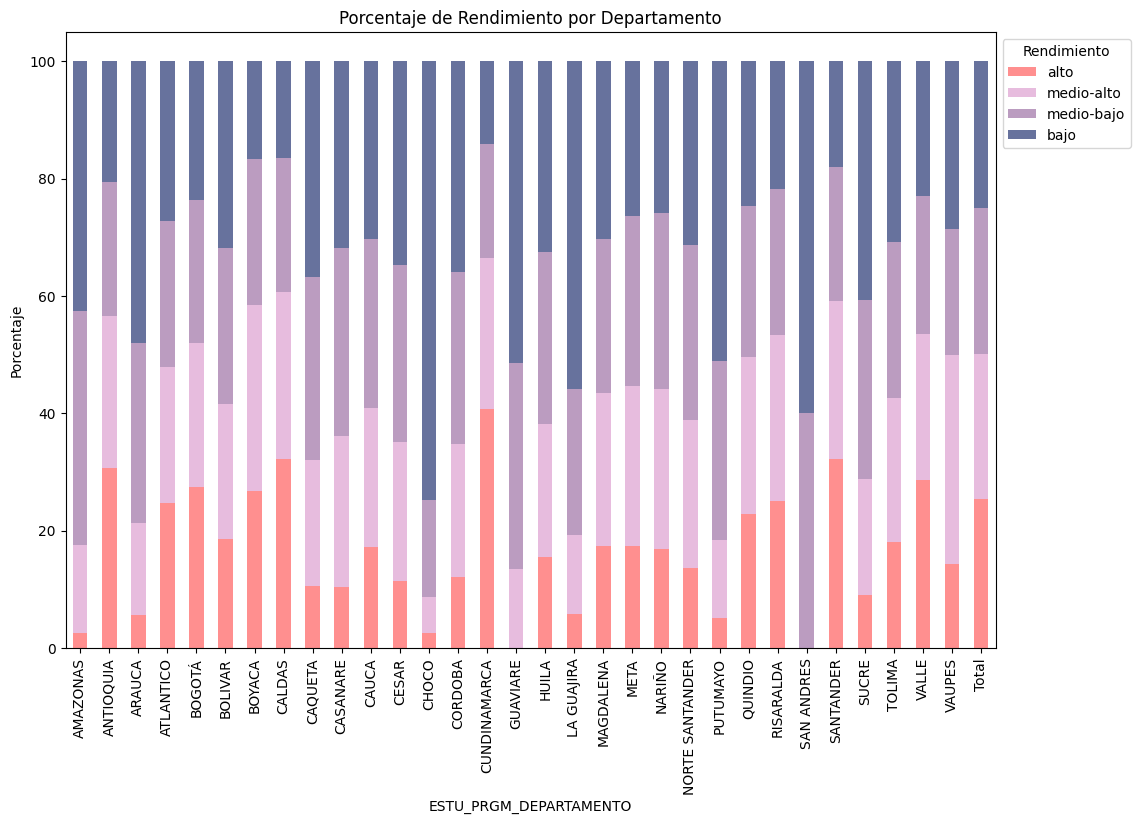

In [ ]:
# Crear una tabla de contingencia (crosstab)
tabla_contingencia = pd.crosstab(train['ESTU_PRGM_DEPARTAMENTO'], train['RENDIMIENTO_GLOBAL'], margins=True, margins_name='Total')
tabla_porcentajes = tabla_contingencia.apply(lambda x: (x/sum(x))*200, axis=1)


# Visualizar la tabla de contingencia
print(tabla_porcentajes)
column_order = [4, 3, 2, 1]

tabla_porcentajes = tabla_porcentajes[column_order]



# Plotting
colors = ['#FF8F8F','#E7BCDE','#BB9CC0','#67729D']
ax = tabla_porcentajes.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
ax.set_title('Porcentaje de Rendimiento por Departamento')
ax.set_xlabel('ESTU_PRGM_DEPARTAMENTO')
ax.set_ylabel('Porcentaje')
plt.legend(title='Rendimiento', bbox_to_anchor=(1, 1), labels=['alto','medio-alto','medio-bajo','bajo'])
plt.show()

Podemos ver como algunos departamentos presentan diferencias notables, departamentos como Chocó no llegan a un 10% de rendimiento alto(o medio alto), cuendo el promedio nacional es del 50%, mientras Cundinamarca supera el 60%.

Haremos una distinción entre departamentos que en general, tienen buen rendimiento con los que no. Para esto usaremos el umbral del 50%, los que tengan más de este umbral en rendimientos altos y medio altos, serán considerados departamentos con buen rendimiento. Estos son:

- ANTIOQUIA
- BOGOTÁ
- BOYACA
- CALDAS
- CUNDINAMARCA
- RISARALDA
- SANTANDER
- VALLE

In [ ]:
tabla_porcentajes.columns

Index([4, 3, 2, 1], dtype='object', name='RENDIMIENTO_GLOBAL')

In [ ]:
deps_altos = tabla_porcentajes[tabla_porcentajes[4]+tabla_porcentajes[3] > 50]

In [ ]:
names_deps_altos = list(deps_altos.index)

In [ ]:
names_deps_altos.pop()
names_deps_altos

['ANTIOQUIA',
 'BOGOTÁ',
 'BOYACA',
 'CALDAS',
 'CUNDINAMARCA',
 'RISARALDA',
 'SANTANDER',
 'VALLE']

**Incluir sí el departamento es o no parte de los mejores**

In [ ]:
labeled_train['ESTU_PRGM_DEPARTAMENTO'] = labeled_train['ESTU_PRGM_DEPARTAMENTO'].apply(lambda x: 1 if x in names_deps_altos else 0)
labeled_test['ESTU_PRGM_DEPARTAMENTO'] = labeled_test['ESTU_PRGM_DEPARTAMENTO'].apply(lambda x: 1 if x in names_deps_altos else 0)

In [ ]:
labeled_train

,ID,PERIODO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,1,6.0,1.0,3.0,1.0,6.0,1.0,1.0,0.0,1.0,10.0,3
1,645256,20212,0,4.0,0.0,3.0,0.0,8.0,1.0,0.0,0.0,1.0,6.0,1
2,308367,20203,1,4.0,4.0,3.0,1.0,5.0,1.0,0.0,0.0,0.0,5.0,1
3,470353,20195,1,5.0,0.0,4.0,1.0,5.0,1.0,0.0,0.0,1.0,5.0,4
4,989032,20212,1,4.0,3.0,3.0,1.0,3.0,1.0,1.0,0.0,1.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,0,2.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0,1.0,4.0,3
692496,754213,20212,0,4.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,4.0,1
692497,504185,20183,1,3.0,1.0,3.0,1.0,5.0,1.0,0.0,1.0,1.0,4.0,2
692498,986620,20195,0,4.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,1


# Estrato

La hipotesis a priori es que el estrato tiene una GRAN correlación con el rendimiento esperado en la prueba, vamos a comprobarlo o desmentirlo

Crearemos una tabla cruzada que nos ayude a entender las diferencias de rendimientos entre los diferentes estratos

RENDIMIENTO_GLOBAL            1          2          3          4  Total
FAMI_ESTRATOVIVIENDA                                                   
1.0                   37.849470  28.213874  21.111518  12.825138  100.0
2.0                   27.885803  26.980160  25.197969  19.936068  100.0
3.0                   20.293804  24.665733  26.979139  28.061324  100.0
4.0                   13.835211  17.816039  24.657325  43.691425  100.0
5.0                   11.568113  14.190105  21.653677  52.588106  100.0
6.0                   10.210234  10.757636  18.357795  60.674336  100.0
Total                 24.980072  24.877256  24.782527  25.360144  100.0


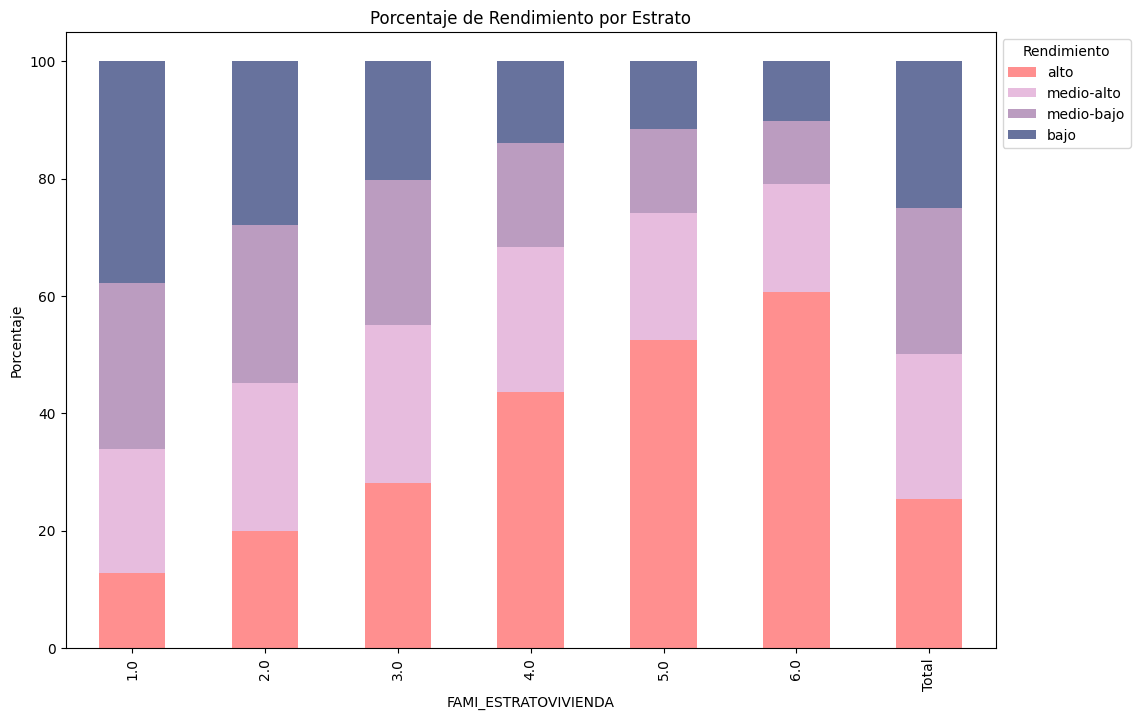

In [ ]:
# Crear una tabla de contingencia (crosstab)
tabla_contingencia = pd.crosstab(labeled_train['FAMI_ESTRATOVIVIENDA'], labeled_train['RENDIMIENTO_GLOBAL'], margins=True, margins_name='Total')
tabla_porcentajes = tabla_contingencia.apply(lambda x: (x/sum(x))*200, axis=1)


# Visualizar la tabla de contingencia
print(tabla_porcentajes)

column_order = [4, 3, 2, 1]
tabla_porcentajes = tabla_porcentajes[column_order]



# Plotting
colors = ['#FF8F8F','#E7BCDE','#BB9CC0','#67729D']
ax = tabla_porcentajes.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
ax.set_title('Porcentaje de Rendimiento por Estrato')
ax.set_xlabel('FAMI_ESTRATOVIVIENDA')
ax.set_ylabel('Porcentaje')
plt.legend(title='Rendimiento', bbox_to_anchor=(1, 1), labels=['alto','medio-alto','medio-bajo','bajo'])
plt.show()


Una vez vista la tabla es obvia la diferencia, entre mayor estrato, mayor rendimiento, esto se cumple SIEMPRE.

- Los estratos 3,4,5 y 6 rebasan el promedio general, lo cual confirma nuestra hipotesis y nos deja ver que hay más gente en estratos bajos que en altos

In [ ]:
for i in range(1,7):
    print(f'Cantidad de estudiantes en el estrato {i}',labeled_train[labeled_train['FAMI_ESTRATOVIVIENDA']==float(i)].shape[0])

Cantidad de estudiantes en el estrato 1 111991
Cantidad de estudiantes en el estrato 2 268097
Cantidad de estudiantes en el estrato 3 210685
Cantidad de estudiantes en el estrato 4 65514
Cantidad de estudiantes en el estrato 5 23608
Cantidad de estudiantes en el estrato 6 12605


# Matriz de correlación

Con la matriz de correlación pretendemos observar patrones en los datos, como cambia un dato cuando el otro varía. Teniendo en cuenta que -1 es una relación perfectamente inversa, 1 una relación inversamente proporcional y 0  sin relación en lo absoluto. De la gráfica podemos observar:


RENDIMIENTO GLOBAL se relaciona de mayor forma con:

- Educación de la madre
- Educación del padre
- Estrato
- Valor de la matrícula

Así mismo se encuentran correlaciones entre otras variables como tener internet y computador, educación del padre y de la madre

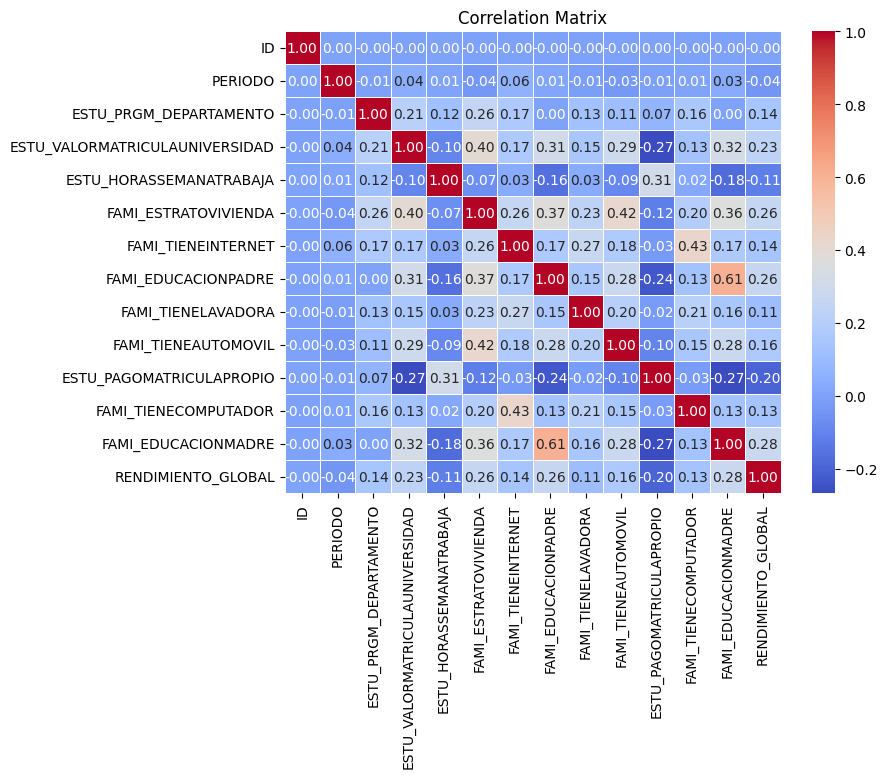

In [ ]:
# Calculate the correlation matrix
correlation_matrix = labeled_train.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [164]:
labeled_train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PAGOMATRICULAPROPIO',
       'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL'],
      dtype='object')

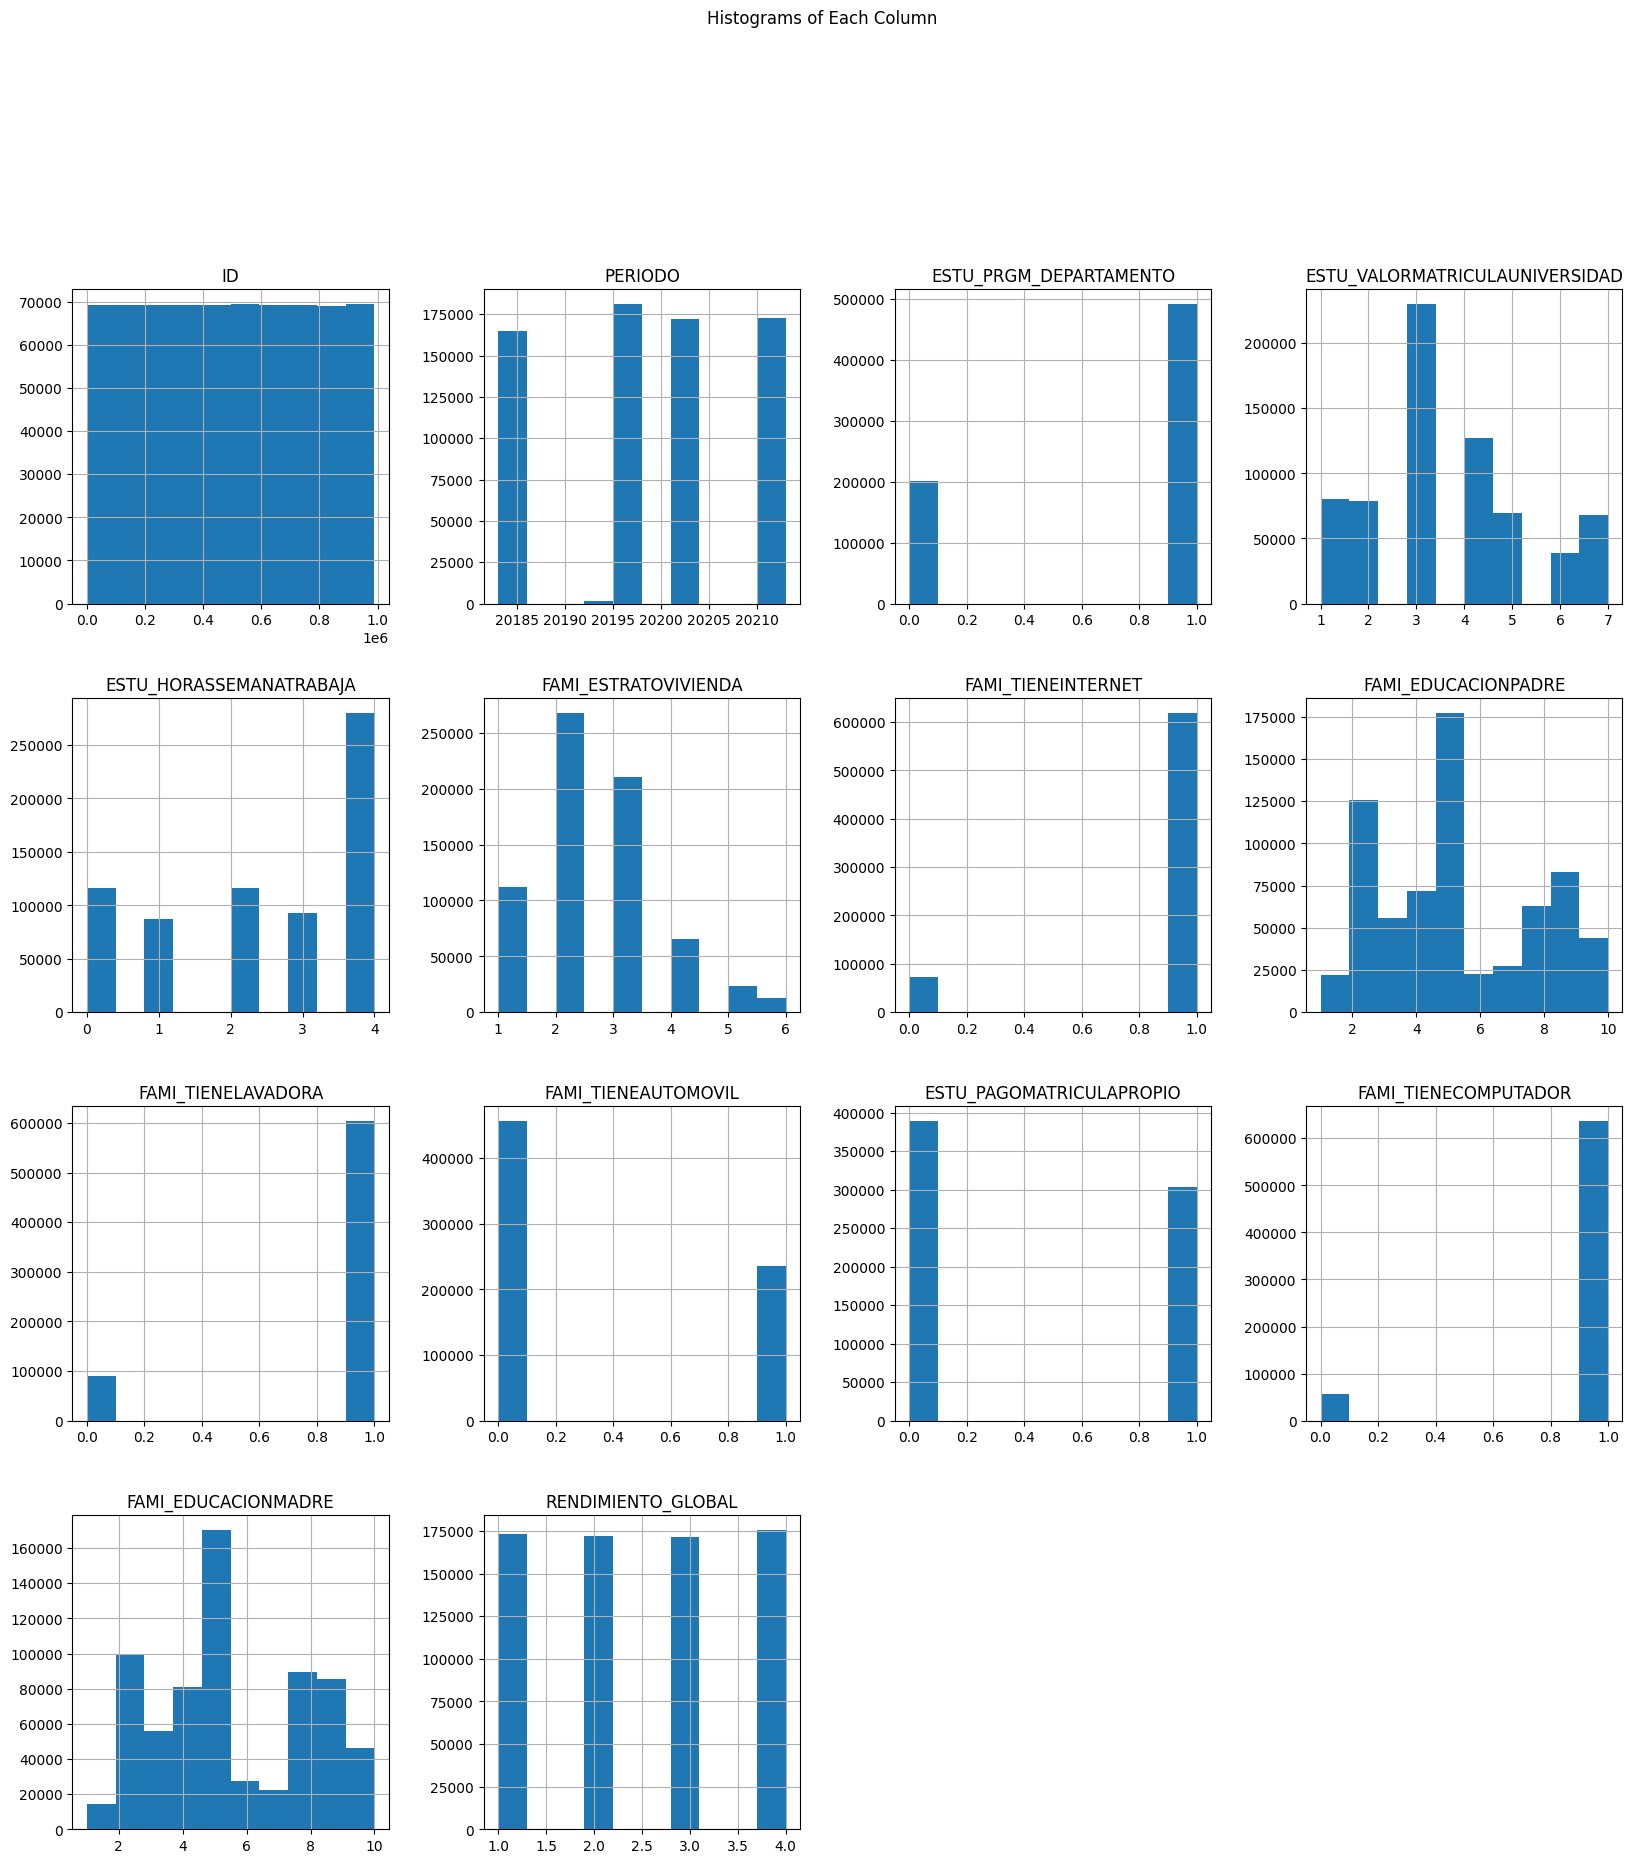

In [168]:
# Plot histograms for each column
labeled_train.hist(figsize=(20, 20), bins=10)  # Adjust figsize and bins as needed
plt.suptitle('Histograms of Each Column', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

# Selección del modelo

# PCA

In [ ]:
#y_train = labeled_train['RENDIMIENTO_GLOBAL']
#X = labeled_train.drop(columns='RENDIMIENTO_GLOBAL')
#X_test = labeled_test.copy()

In [ ]:
#pca = PCA(n_components=9)
#pca.fit(X)

#X_train = pca.transform(X)
#X_test =  pca.transform(labeled_test)

# One hot encoding

In [ ]:
labeled_train

,ID,PERIODO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,1,6.0,1.0,3.0,1.0,6.0,1.0,1.0,0.0,1.0,10.0,3
1,645256,20212,0,4.0,0.0,3.0,0.0,8.0,1.0,0.0,0.0,1.0,6.0,1
2,308367,20203,1,4.0,4.0,3.0,1.0,5.0,1.0,0.0,0.0,0.0,5.0,1
3,470353,20195,1,5.0,0.0,4.0,1.0,5.0,1.0,0.0,0.0,1.0,5.0,4
4,989032,20212,1,4.0,3.0,3.0,1.0,3.0,1.0,1.0,0.0,1.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,0,2.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0,1.0,4.0,3
692496,754213,20212,0,4.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,4.0,1
692497,504185,20183,1,3.0,1.0,3.0,1.0,5.0,1.0,0.0,1.0,1.0,4.0,2
692498,986620,20195,0,4.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,1


In [ ]:
y_train = labeled_train['RENDIMIENTO_GLOBAL']
X_train = labeled_train.drop(columns='RENDIMIENTO_GLOBAL')

In [145]:
X_test = labeled_test.copy()
solution_path = '/content/drive/MyDrive/Semestre 8/AI & Data Science/PruebasSaberPro/solution.csv'
solution = pd.read_csv(solution_path)

In [146]:
solution = solution['RENDIMIENTO_GLOBAL']

In [155]:
label_score = {
    "alto":4,"medio-alto":3,"medio-bajo":2,"bajo":1
}

solution = solution.map(label_score)

# Entrenamiento del modelo

# Redes Neuronales

In [128]:
# División del conjunto de datos en conjuntos de entrenamiento y prueba
X, X_val, y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [129]:
# Escalado de características para normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.fit_transform(X_val)

In [130]:
y = to_categorical(y - 1, num_classes=4)
y_val_bin = to_categorical(y_val - 1, num_classes=4)

In [119]:
# Creación del modelo de la red neuronal
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu', kernel_regularizer=regularizers.l1(0.01))) # Regularización L1
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 clases, función de activación softmax


In [120]:
# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(X, y, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
17313/17313 [==============================] - 43s 2ms/step - loss: 1.3020 - accuracy: 0.3844 - val_loss: 1.2837 - val_accuracy: 0.3883
Epoch 2/5
17313/17313 [==============================] - 45s 3ms/step - loss: 1.2847 - accuracy: 0.3885 - val_loss: 1.2809 - val_accuracy: 0.3902
Epoch 3/5
17313/17313 [==============================] - 45s 3ms/step - loss: 1.2842 - accuracy: 0.3893 - val_loss: 1.2802 - val_accuracy: 0.3911
Epoch 4/5
17313/17313 [==============================] - 45s 3ms/step - loss: 1.2837 - accuracy: 0.3889 - val_loss: 1.2798 - val_accuracy: 0.3912
Epoch 5/5
17313/17313 [==============================] - 46s 3ms/step - loss: 1.2833 - accuracy: 0.3895 - val_loss: 1.2806 - val_accuracy: 0.3909


In [131]:
# Realiza predicciones en el conjunto de prueba
predictions = model.predict(X_val)
# Convert probabilities to predicted classes
predictions = np.argmax(predictions, axis=1)
# Evalúa la precisión del ensemble

4329/4329 [==============================] - 6s 1ms/step


In [132]:
predictions

array([2, 3, 2, ..., 1, 2, 0])

In [133]:
y_val

137278    2
534550    4
314034    2
418461    3
521356    2
         ..
457734    4
329976    4
55010     1
194187    2
628411    1
Name: RENDIMIENTO_GLOBAL, Length: 138500, dtype: int64

In [134]:
# Evalúa la precisión del ensemble
accuracy = accuracy_score(y_val, predictions+1)
print('Accuracy = %.2f%s'%(accuracy*100, '%'))

Accuracy = 39.09%


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supongamos que X_train y y_train son tus conjuntos de datos de entrenamiento
# y que tienes un conjunto de prueba X_test, y_test


# División del conjunto de datos en conjuntos de entrenamiento y prueba
X, X_val, y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Configura el clasificador base (MLPClassifier en este caso)
base_classifier = MLPClassifier(hidden_layer_sizes=(8, 8), activation='relu', max_iter=5, random_state=42)
base_classifier.n_outputs_ = 4

# Configura el ensemble con BaggingClassifier
ensemble_classifier = BaggingClassifier(base_classifier, n_estimators=3, random_state=42)

# Entrena el ensemble
ensemble_classifier.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


BaggingClassifier(estimator=MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=5,
                                          random_state=42),
                  n_estimators=3, random_state=42)

In [ ]:
# Realiza predicciones en el conjunto de prueba
predictions = ensemble_classifier.predict(X_val)

# Evalúa la precisión del ensemble
accuracy = accuracy_score(y_val, predictions)
print('Accuracy = %.2f%s'%(accuracy*100, '%'))

Accuracy = 26.34%


# RandomForest

In [ ]:
reg = RandomForestClassifier()

parametros = {
    'n_estimators': range(10,15),
    'criterion': ['log_loss','entropy'],
    'max_depth': range(4,8)
}

rand_est = RandomizedSearchCV(reg, parametros,n_iter = 6, cv = 3, scoring = 'neg_mean_absolute_error').fit(X_train,y_train)

In [ ]:
rand_est

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=6,
                   param_distributions={'criterion': ['log_loss', 'entropy'],
                                        'max_depth': range(4, 8),
                                        'n_estimators': range(10, 15)},
                   scoring='neg_mean_absolute_error')

In [ ]:
score = {
    4:"alto",
    3:"medio-alto",
    2:"medio-bajo",
    1:"bajo"
}

In [ ]:
pred_df = pd.DataFrame(pred)

pred_df = pred_df.rename(columns = {0:'RENDIMIENTO_GLOBAL'})
pred_df['RENDIMIENTO_GLOBAL'] = pred_df['RENDIMIENTO_GLOBAL'].map(score)
pred_df

In [ ]:
labeled_test['RENDIMIENTO_GLOBAL'] = pred_df.values
labeled_test = labeled_test[['ID','RENDIMIENTO_GLOBAL']]
labeled_test.to_csv('prueba.csv', index=False)